# NBA Players selection using Machine Learning

### Project Description

<p>
Consider that I am having a basketball team and want to select some good players for my team. I would like to perform the following;

<br>

* <b>Machine Learning Model 1:</b> Classifying the players who will be staying with the league for more than 5 years or less than that. <br>
* <b>Machine Learning Model 2:</b> Considering the players who are good as input, will be predicting their position in the basketball court. <br>
* <b>Machine Learning Model 3:</b> Based on the above outputs, this model will predict their salaries.<br>

* <b>Web App:</b> Building a web app using Angular as front end and Python REST as back end, in which the user or the coach has to load the csv file containing the player’s history and this system will run the input through all these models and will  finalize the players list who are required for the team with their respective salaries and positions in the basketball court.
</p>

### Data

Data for the above mentioned machine learning models are being collected from the following sites;

* https://data.world/
* https://www.basketball-reference.com/
* https://www.kaggle.com/felixdonovan/predicting-the-all-nba-teams/data

The collected data undergoes the following data preparation steps such as cleaning, standardization, missing value imputation and et cetera.

### Data Loading and Preprorcessing, Descriptive Statistics, Visualisation and Machine Learning model building

#### Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import pickle

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

%matplotlib inline

## With Model 1 Data

In [2]:
ml_Model_1_Data = pd.read_csv("Data/nba_Longevity.csv")
ml_Model_1_Data.rename(columns ={"MIN":"MP","FGM":"FG","3P Made":"3P","FTM":"FT","OREB":"ORB","DREB":"DRB","REB":"TRB"},inplace=True)
ml_Model_1_Data.columns

Index(['Name', 'GP', 'MP', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'TARGET_5Yrs'],
      dtype='object')

In [3]:
ml_Model_1_Data['TARGET_5Yrs'] = ml_Model_1_Data['TARGET_5Yrs'].astype('int64')
ml_Model_1_Data

Name  GP    MP  PTS   FG  FGA   FG%   3P  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7  0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6  0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2  0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6  0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4  0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...  ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3  0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8  0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0  0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9  0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9  0.4  1.3  33.3  ...   

      FTA   FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  TARGET_5Yrs  
0     2.3  69.9  0.7  3.4  4.1  1.9  0.4  0.4  1.3            0  
1     3.4  76.5  0.5  2.0  2.4  3.7  1.1  0.5  1.6            0  
2     1.3  67.0  0.5  1.7  2.2  1.0  0.5  0.3  1.0            0  
3     1.3  68.9  1.0  0.9  1.9  0.8  0.6  0.1  1.0            1  
4     1.9  67.4  1.0  1.5  2.5  0.3  0.3  0.4  0.8            1  
...   ...   ...  ...  ...  ...  ...  ...  ...  ...          ...  
1335  1.5  79.2  0.4  0.8  1.2  2.5  0.6  0.2  0.8            0  
1336  1.0  79.4  0.4  1.1  1.5  2.3  0.8  0.0  1.3            1  
1337  1.6  64.3  1.5  2.3  3.8  0.3  0.3  0.4  0.9            0  
1338  1.8  62.5  0.2  0.4  0.7  2.2  0.4  0.1  0.8            1  
1339  1.0  67.3  0.2  0.7  0.9  1.4  0.7  0.1  0.9            1  

[1340 rows x 21 columns]

In [4]:
#Checking for missing values
ml_Model_1_Data.isna().sum()

Name            0
GP              0
MP              0
PTS             0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%            11
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [5]:
len(ml_Model_1_Data.index)

1340

In [6]:
ml_Model_1_Data = ml_Model_1_Data.dropna()

In [7]:
#Imputing Missing values
ml_Model_1_Data = ml_Model_1_Data.fillna(ml_Model_1_Data.mean())
ml_Model_1_Data.isna().sum()

Name           0
GP             0
MP             0
PTS            0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

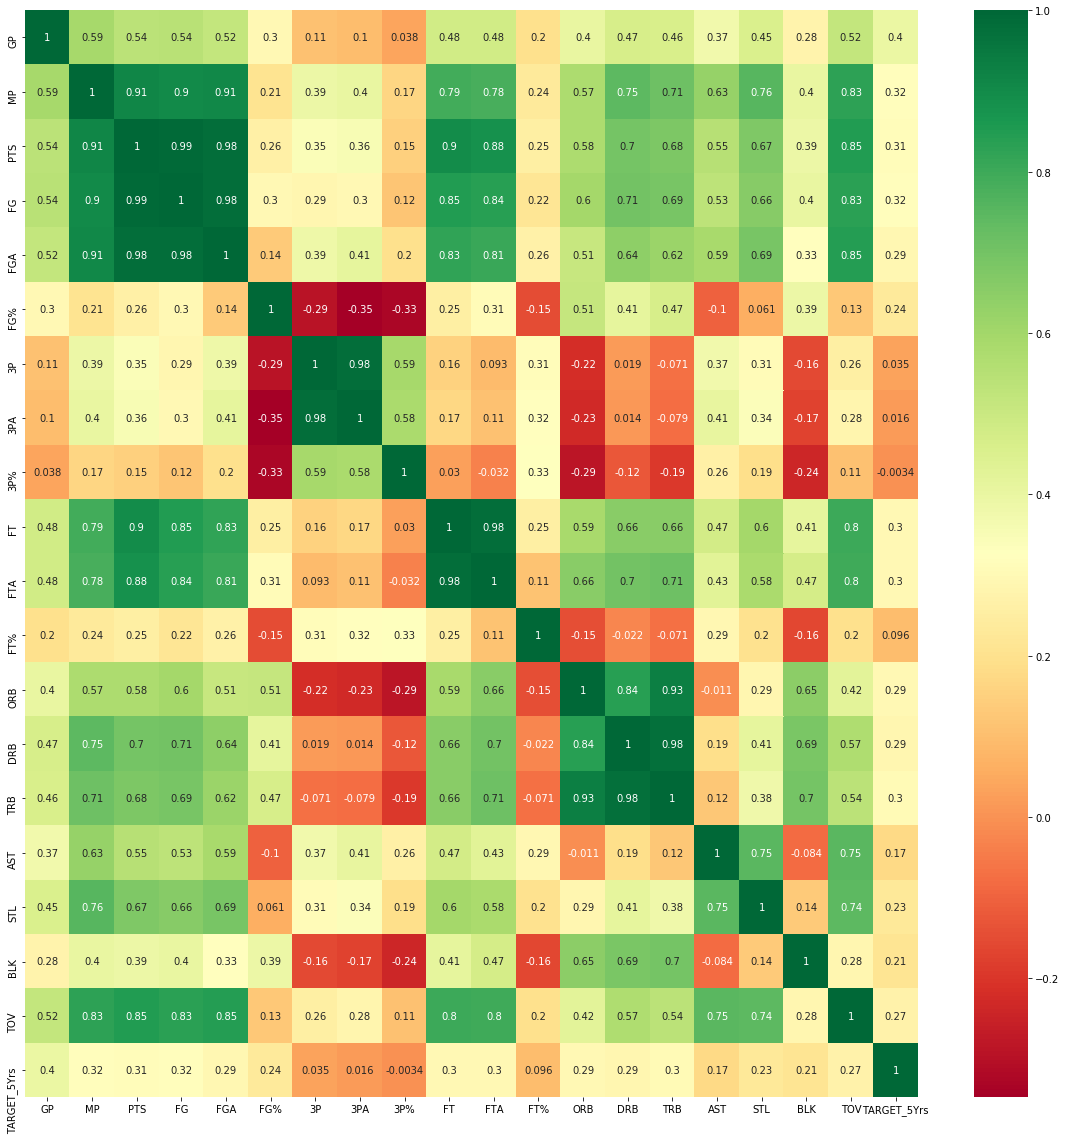

In [8]:
#Feature selection
correlation_Matrix_1 = ml_Model_1_Data.corr()
features_1 = correlation_Matrix_1.index
plt.figure(figsize=(20,20))
ml_1_data_heatMap = sns.heatmap(ml_Model_1_Data[features_1].corr(),annot=True,cmap="RdYlGn")

<p>
    From the above correlation heatmap last row, we could see that <b>GP (Games Played)</b> is correlated well with the target variable followed by <b>MP (Minutes Played), PTS (Points), FG (Field Goals), etc.</b>, but features such as <b>3P (3-Point Field Goals), 3PA (3-Point Field Goal Attempts)</b> and <b>3P% (3-Point Field Goal Percentage)</b> are less or negative correlated with target variable. The above mentioned highly correlated features might decrease the performance of classification algorithms. 
</p>
<br>
<p>
    But, I would like to run the classification algorithms with all features and only with selected features, compare their performance and select the model.
</p>

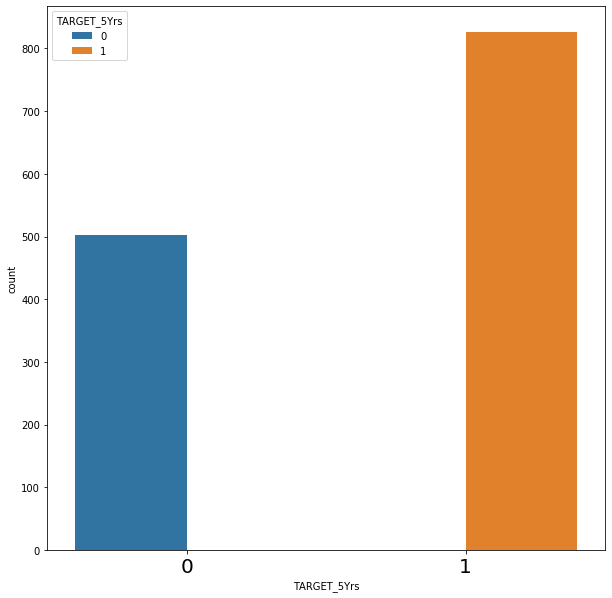

In [9]:
#Checking whether data are imbalanced or not
plt.figure(figsize=(10,10))
plt.rcParams["xtick.labelsize"] = 20
imbalance = sns.countplot(x='TARGET_5Yrs',hue="TARGET_5Yrs",data=ml_Model_1_Data)

From the above countplot, we could see that this dataset is imbalanced by having over <b>800</b> records for Yes i.e. 1 and <b>500</b> records for No i.e. 0

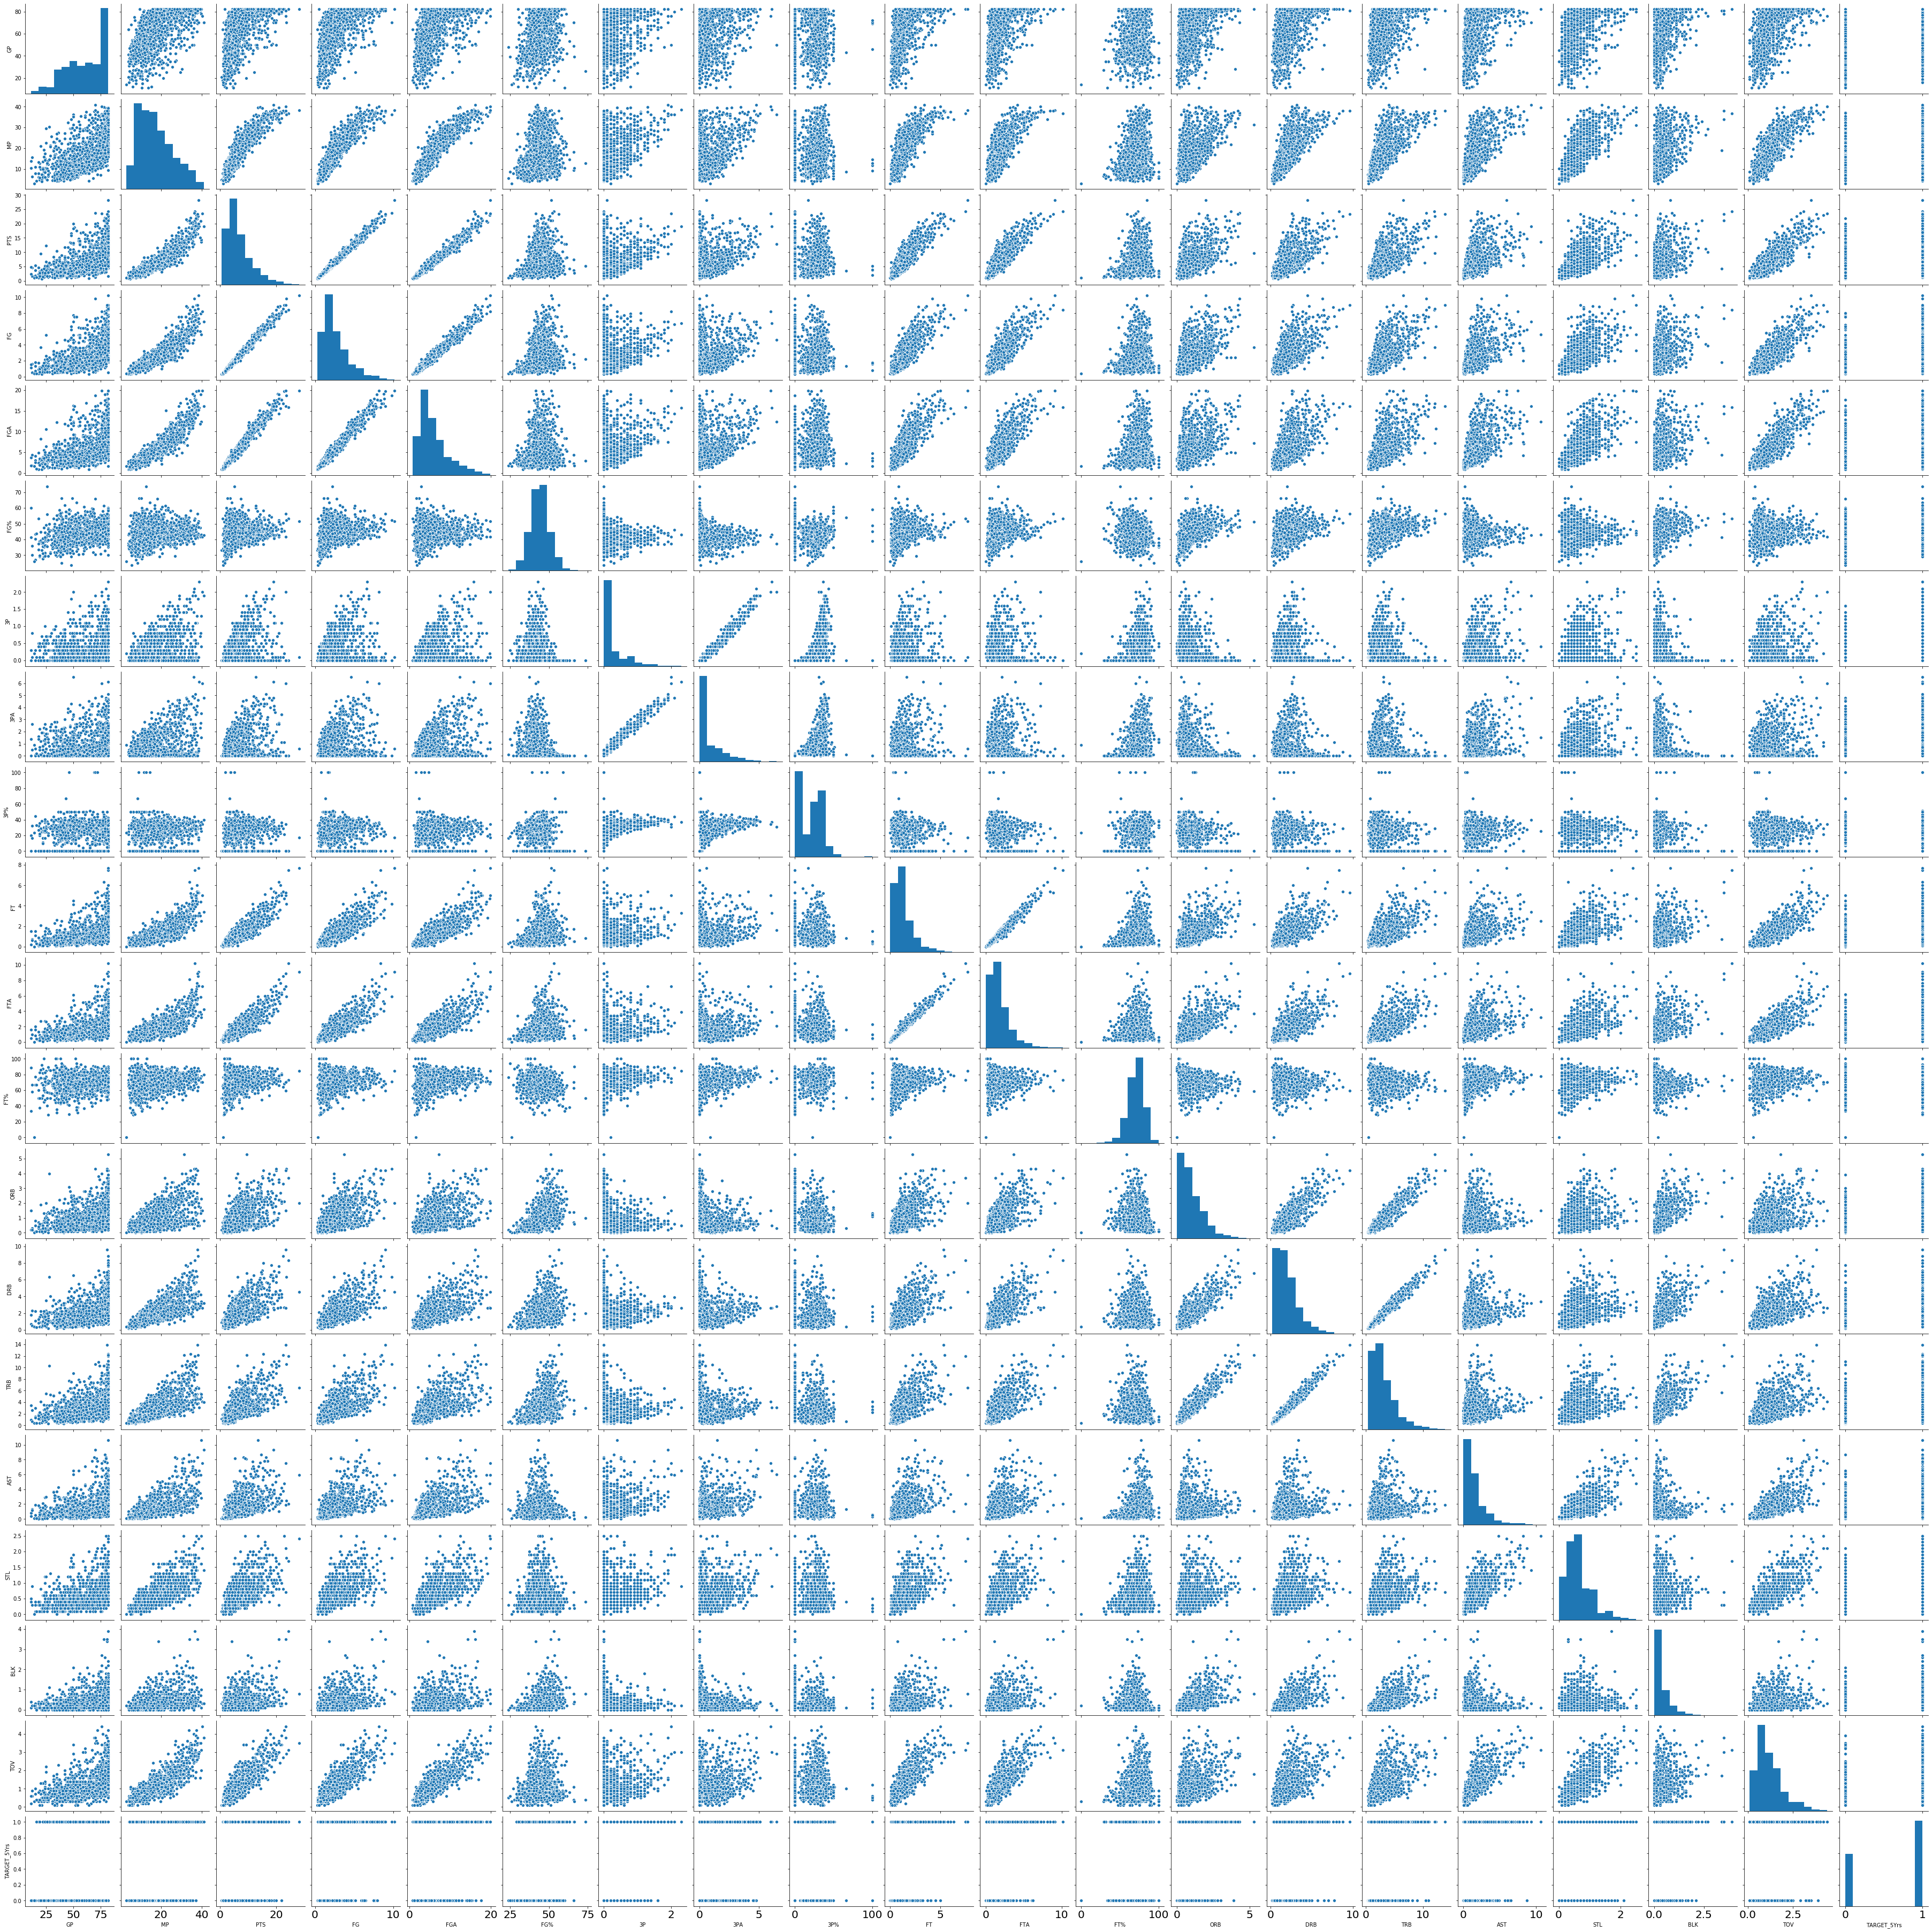

In [10]:
sns.pairplot(ml_Model_1_Data)

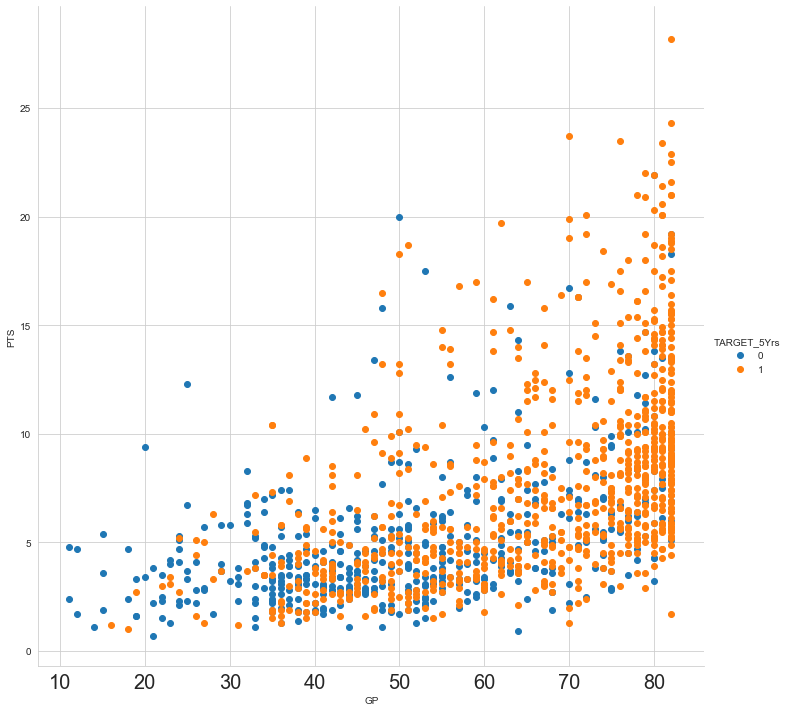

In [11]:
#Checking for linear separability
sns.set_style("whitegrid")
sns.FacetGrid(ml_Model_1_Data, hue="TARGET_5Yrs", height=10) \
   .map(plt.scatter, "GP", "PTS") \
   .add_legend()
plt.show()

<p>
    From the above plot, we can see two things; Firstly, the data is not linearly separable, hence we need to apply non-linear classification algorithms such as <b> SVM Kernel, k-nearest-neighbors (kNN), etc.</b>. Secondly, The players who stay with the league for more than 5 years have played more games and scored more points when compared with players who had stayed with the league for less than 5 years.
</p>

In [12]:
ml_Model_1_Data_With_All_Features = ml_Model_1_Data
ml_Model_1_Data_With_Selected_Features = ml_Model_1_Data

ml_Model_1_Data_With_Selected_Features = ml_Model_1_Data_With_Selected_Features.drop(['3P','3PA','3P%'],axis=1)

#Segregating dependent variable and independent variables
x1 = ml_Model_1_Data_With_All_Features.iloc[:,1:-1] #Independent variables.
y1 = ml_Model_1_Data_With_All_Features.iloc[:,-1] #Dependent or target variable.

x2 = ml_Model_1_Data_With_All_Features.iloc[:,1:-1] #Independent variables.
y2 = ml_Model_1_Data_With_All_Features.iloc[:,-1] #Dependent or target variable.

x3 = ml_Model_1_Data_With_Selected_Features.iloc[:,1:-1] #Independent variables.
y3 = ml_Model_1_Data_With_Selected_Features.iloc[:,-1] #Dependent or target variable.

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(x2, y2)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x2)
# Summarize selected features
print(features[0:10,:])

#GP, MP, PTS, FG, FGA, FT, FTA, ORB, DRB, TRB

In [13]:
x2 = x2.iloc[:,[0,1,2,3,4,9,10,12,13,14]]

In [14]:
#Splitting the data into train and test
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x1, y1, test_size=0.2, random_state=0)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(x2, y2, test_size=0.2, random_state=0)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=27)
X_train_1,Y_train_1 = sm.fit_resample(X_train_1,Y_train_1)
X_train_3,Y_train_3 = sm.fit_resample(X_train_3,Y_train_3)
X_train_2,Y_train_2 = sm.fit_resample(X_train_2,Y_train_2)

In [ ]:
Y_train_1.value_counts()

In [15]:
#Scaling
sc_X_1 = StandardScaler()
X_train_1 = sc_X_1.fit_transform(X_train_1)
X_test_1 = sc_X_1.transform(X_test_1)

sc_X_3 = StandardScaler()
X_train_3 = sc_X_3.fit_transform(X_train_3)
X_test_3 = sc_X_3.transform(X_test_3)

sc_X_2 = StandardScaler()
X_train_2 = sc_X_2.fit_transform(X_train_2)
X_test_2 = sc_X_2.transform(X_test_2)

In [16]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [23]:
#Model Fitting
def SVMModel(X_train,X_test,Y_train,Y_test):
    svclassifier_1 = SVC(kernel='rbf',probability=True,C=1).fit(X_train, Y_train)
    probas_1 = svclassifier_1.predict_proba(X_train)
    probas_2 = svclassifier_1.predict_proba(X_test)

    #Prediction and evaluation
    Y_svm_pred_1 = svclassifier_1.predict(X_train)
    Y_svm_pred_2 = svclassifier_1.predict(X_test)
    
    print("\n###############Training######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_train, Y_svm_pred_1))
    print("Accuracy: ",round(accuracy(confusion_matrix(Y_train, Y_svm_pred_1)),2))

    print('Precision : {}'.format(round(precision_score(Y_train, Y_svm_pred_1),3)))
    print('Recall    : {}'.format(round(recall_score(Y_train, Y_svm_pred_1),3)))
    print('F-score   : {}'.format(round(f1_score(Y_train, Y_svm_pred_1),3)))
    
    fpr_1, tpr_1, thresholds_1 = roc_curve(Y_train, probas_1[:, 1])
    roc_auc_1 = round(auc(fpr_1, tpr_1),2)
    print("\nArea under the ROC curve for train : %f" % roc_auc_1)

    print("\n###############Testing######################\n")
    print("Confusion Matrix : \n", confusion_matrix(Y_test, Y_svm_pred_2))
    print("Accuracy: ",round(accuracy(confusion_matrix(Y_test, Y_svm_pred_2)),2))

    print('Precision : {}'.format(round(precision_score(Y_test, Y_svm_pred_2),3)))
    print('Recall    : {}'.format(round(recall_score(Y_test, Y_svm_pred_2),3)))
    print('F-score   : {}'.format(round(f1_score(Y_test, Y_svm_pred_2),3)))
    
    fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test, probas_2[:, 1])
    roc_auc_2 = round(auc(fpr_2, tpr_2),2)
    print("\nArea under the ROC curve for test : %f" % roc_auc_2)
    
    plt.clf()
    plt.figure(figsize=(7,7))
    plt.plot(fpr_1, tpr_1, label='Train ROC curve (area = %0.2f)' % roc_auc_1)
    plt.plot(fpr_2, tpr_2, label='Test ROC curve (area = %0.2f)' % roc_auc_2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return svclassifier_1

#### With all features


###############Training######################

Confusion Matrix : 
 [[220 179]
 [ 93 571]]
Accuracy:  0.74
Precision : 0.761
Recall    : 0.86
F-score   : 0.808

Area under the ROC curve for train : 0.800000

###############Testing######################

Confusion Matrix : 
 [[ 54  50]
 [ 26 136]]
Accuracy:  0.71
Precision : 0.731
Recall    : 0.84
F-score   : 0.782

Area under the ROC curve for test : 0.760000


<Figure size 432x288 with 0 Axes>

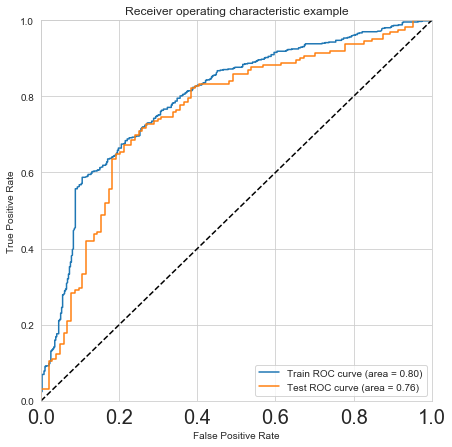

In [24]:
model_1_1 = SVMModel(X_train_1, X_test_1, Y_train_1, Y_test_1)

#### With selected features


###############Training######################

Confusion Matrix : 
 [[211 188]
 [102 562]]
Accuracy:  0.73
Precision : 0.749
Recall    : 0.846
F-score   : 0.795

Area under the ROC curve for train : 0.780000

###############Testing######################

Confusion Matrix : 
 [[ 54  50]
 [ 25 137]]
Accuracy:  0.72
Precision : 0.733
Recall    : 0.846
F-score   : 0.785

Area under the ROC curve for test : 0.750000


<Figure size 432x288 with 0 Axes>

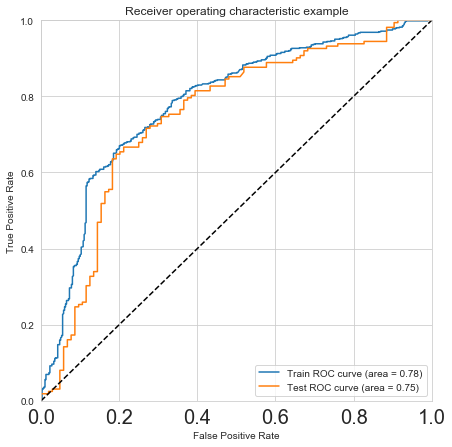

In [25]:
model_1_2 = SVMModel(X_train_3, X_test_3, Y_train_3, Y_test_3)

#### With features from feature selection


###############Training######################

Confusion Matrix : 
 [[210 189]
 [108 556]]
Accuracy:  0.72
Precision : 0.746
Recall    : 0.837
F-score   : 0.789

Area under the ROC curve for train : 0.760000

###############Testing######################

Confusion Matrix : 
 [[ 53  51]
 [ 25 137]]
Accuracy:  0.71
Precision : 0.729
Recall    : 0.846
F-score   : 0.783

Area under the ROC curve for test : 0.740000


<Figure size 432x288 with 0 Axes>

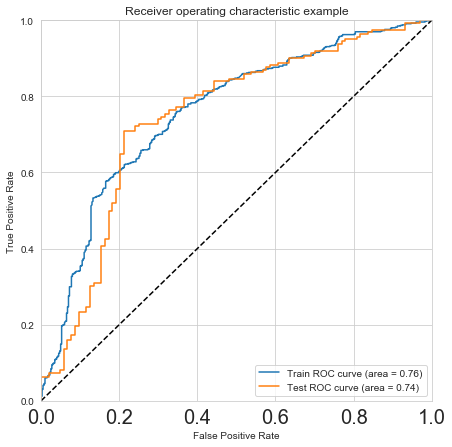

In [26]:
model_1_3 = SVMModel(X_train_2, X_test_2, Y_train_2, Y_test_2)

<img src="Docs/Depiction-of-a-ROC-Curve.jpg"></img>
<p>
    From the above AUC ROC curve plots (<b> with all features</b>, <b> With selected features based on domain knowledge </b> and <b> with features selected using feature selection techniques </b>), it can be seen that model performs better with all features than with selected features. Also comparing our AUC ROC curve plot(with all features) with the above theoritical AUC ROC curve, it can be seen that our model is a <b> skillful classifier </b>.
Since the dataset is imbalanced, we need to use different metrics to evaluate the model, hence I have chosen AUC ROC curve over accuracy. Based on the observation, I have found that AUC ROC value with all features is higher (<b>76% for test data and 80% for training data</b>) than the ROC value with selected features.
<br>
<br>
Moreover, we could see that the model's performance is average, this could be because of one of the following reasons:
    <br>
    <b>*</b> Imbalanced Dataset <br>
    <b>*</b> Small data size
</p>

#### Saving the model

In [ ]:
filename = 'ML_Models/Career_Longevity.sav'
pickle.dump(model_1_1, open(filename, 'wb'))

## With Model 2 Data

In [ ]:
seasons_Data = pd.read_csv("Data/Seasons_Data.csv")
seasons_Data.columns

In [ ]:
seasons_Data[['Player']] = seasons_Data.Player.str.split("\\").str[0]
seasons_Data

In [ ]:
seasons_Data[['Pos']] = seasons_Data.Pos.str.split("-").str[0]
seasons_Data['Pos'].value_counts()

In [ ]:
seasons_Data = seasons_Data.drop("Tm",axis = 1)
ml_Model_2_Data = seasons_Data
ml_Model_2_Data

In [ ]:
#Checking for missing values
ml_Model_2_Data.isna().sum()

In [ ]:
#Imputing Missing values
ml_Model_2_Data = ml_Model_2_Data.fillna(ml_Model_2_Data.median())
ml_Model_2_Data.isna().sum()

In [ ]:
ml_Model_2_Data.columns

In [ ]:
ml_Model_2_Data = ml_Model_2_Data[['Player', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','Pos']]
ml_Model_2_Data['Pos'] = ml_Model_2_Data.Pos.map(dict(SG=1, PG=2, PF=3, C=4, SF=5))
ml_Model_2_Data.columns

In [ ]:
ml_Model_2_Data['Pos'].value_counts()

In [ ]:
# Count of target labels and to check for imbalance dataset
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.rcParams["xtick.labelsize"] = 15
imbalance = sns.countplot(x='Pos',hue="Pos",data=ml_Model_2_Data)
imbalance.set(xlabel='Positions', ylabel='No. of players')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Positions")
print("SG=1, PG=2, PF=3, C=4, SF=5")

###### From the above countplot, we could see that this dataset is not imbalanced which could make our model better in predicting positions of players

In [ ]:
#Checking for linear separability
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.FacetGrid(ml_Model_2_Data, hue="Pos", height=10) \
   .map(plt.scatter, "G", "PTS") \
   .add_legend() \
   .set_axis_labels(x_var='Games Played', y_var='Points') \
   ._legend.set_title("Positions")
   #.axes[0,0].set_ylabel('axes label 1')
plt.show()

From the above plot, we can see two things; Firstly, the data is not linearly separable, hence we need to apply non-linear classification algorithms such as SVM Kernel, k-nearest-neighbors (kNN), etc.. Secondly, The players who have positions except Small Forward (SF) have scored more scores in the number of games they have played.

In [ ]:
sns.pairplot(ml_Model_2_Data)

In [ ]:
#Segregating input and output data
# x = ml_Model_2_3_Data.iloc[:,1:-1]
# y = ml_Model_2_3_Data.iloc[:,-1]
b4_Ft_Selection = ml_Model_2_Data
X_train, X_test, Y_train, Y_test = train_test_split(b4_Ft_Selection.drop(labels = ['Pos','Player'],axis=1), b4_Ft_Selection['Pos'], 
                                                    test_size=0.2, random_state=0)

#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Model Fitting with all features
svclassifier = SVC(kernel='rbf',probability=True)
svclassifier.fit(X_train, Y_train)
probabilities = svclassifier.fit(X_train, Y_train).predict_proba(X_test)

#Prediction and evaluation
Y_svm_pred = svclassifier.predict(X_test)
print(confusion_matrix(Y_test, Y_svm_pred))
print("Accuracy: ",round(accuracy(confusion_matrix(Y_test, Y_svm_pred)),2))

precision,recall,fscore,support = score(Y_test, Y_svm_pred,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))

In [ ]:
#Feature selection
correlation_Matrix_2 = ml_Model_2_Data.corr()
features_2 = correlation_Matrix_2.index
plt.figure(figsize=(30,20))
ml_2_data_heatMap = sns.heatmap(ml_Model_2_Data[features_2].corr(),annot=True,cmap="RdYlGn")

I think we cannot select the features which improves our model from the above visualization. Hence we need to select features using correlation matrix having correlation value above 0.5 and remove the irrelavant features from the data.

In [ ]:
correlated_features = set()
for i in range(len(correlation_Matrix .columns)):
    for j in range(i):
        if abs(correlation_Matrix.iloc[i, j]) > 0.9:
            colname = correlation_Matrix.columns[i]
            correlated_features.add(colname)
len(correlated_features)

In [ ]:
non_Correlated_Independent_Data = ml_Model_2_Data
non_Correlated_Independent_Data.drop(correlated_features,axis=1)

In [ ]:
temp_data = non_Correlated_Independent_Data
X_train, X_test, Y_train, Y_test = train_test_split(temp_data.drop(labels = ['Pos','Player'],axis=1), temp_data['Pos'], 
                                                    test_size=0.2, random_state=0)

#Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Model Fitting with non-correlated features
svclassifier = SVC(kernel='rbf',probability=True)
svclassifier.fit(X_train, Y_train)
probabilities = svclassifier.fit(X_train, Y_train).predict_proba(X_test)

#Prediction and evaluation
Y_svm_pred = svclassifier.predict(X_test)
print(confusion_matrix(Y_test, Y_svm_pred))
print("Accuracy: ",round(accuracy(confusion_matrix(Y_test, Y_svm_pred)),2))

precision,recall,fscore,support = score(Y_test, Y_svm_pred,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))

## With Model 3 Data

In [29]:
salaries = pd.read_csv("Data/nba_2017_popularity.csv")

In [30]:
salaries.head()

Unnamed: 0             PLAYER  AGE    MP    FG   FGA    FG%   3P  3PA  \
0           0  Russell Westbrook   28  34.6  10.2  24.0  0.425  2.5  7.2   
1           1       James Harden   27  36.4   8.3  18.9  0.440  3.2  9.3   
2           2      Anthony Davis   23  36.1  10.3  20.3  0.505  0.5  1.8   
3           3   DeMarcus Cousins   26  34.2   9.0  19.9  0.452  1.8  5.0   
4           4     Damian Lillard   26  35.9   8.8  19.8  0.444  2.9  7.7   

     3P%  ...  DRPM   RPM  WINS_RPM   PIE    PACE   W  PAGEVIEWS  \
0  0.343  ... -0.47  6.27     17.34  23.0  102.31  46     4279.0   
1  0.347  ... -1.57  4.81     15.54  19.0  102.98  54     3279.0   
2  0.299  ...  3.90  4.35     12.81  19.2  100.19  31       82.5   
3  0.361  ...  0.64  4.20     11.26  17.8   97.11  30     1625.5   
4  0.370  ... -1.49  3.14     10.72  15.9   99.68  38     1830.5   

   TWITTER_FAVORITE_COUNT  TWITTER_RETWEET_COUNT  SALARY_MILLIONS  
0                  2130.5                  559.0            26.50  
1                   969.0                  321.5            26.50  
2                   368.0                  104.0            22.12  
3                   102.0                   91.5            16.96  
4                   186.5                   43.0            24.33  

[5 rows x 40 columns]

In [31]:
salaries.columns.tolist()

['Unnamed: 0',
 'PLAYER',
 'AGE',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'POINTS',
 'TEAM',
 'GP',
 'MPG',
 'ORPM',
 'DRPM',
 'RPM',
 'WINS_RPM',
 'PIE',
 'PACE',
 'W',
 'PAGEVIEWS',
 'TWITTER_FAVORITE_COUNT',
 'TWITTER_RETWEET_COUNT',
 'SALARY_MILLIONS']

In [32]:
salaries = salaries.drop(["Unnamed: 0","TEAM"],axis = 1)

In [33]:
salaries.isna().sum()

PLAYER                    0
AGE                       0
MP                        0
FG                        0
FGA                       0
FG%                       0
3P                        0
3PA                       0
3P%                       7
2P                        0
2PA                       0
2P%                       0
eFG%                      0
FT                        0
FTA                       0
FT%                       2
ORB                       0
DRB                       0
TRB                       0
AST                       0
STL                       0
BLK                       0
TOV                       0
PF                        0
POINTS                    0
GP                        0
MPG                       0
ORPM                      0
DRPM                      0
RPM                       0
WINS_RPM                  0
PIE                       0
PACE                      0
W                         0
PAGEVIEWS                 0
TWITTER_FAVORITE_COU

In [34]:
salaries.shape

(239, 38)

In [35]:
salaries = salaries.fillna(0)
salaries.isna().count()

PLAYER                    239
AGE                       239
MP                        239
FG                        239
FGA                       239
FG%                       239
3P                        239
3PA                       239
3P%                       239
2P                        239
2PA                       239
2P%                       239
eFG%                      239
FT                        239
FTA                       239
FT%                       239
ORB                       239
DRB                       239
TRB                       239
AST                       239
STL                       239
BLK                       239
TOV                       239
PF                        239
POINTS                    239
GP                        239
MPG                       239
ORPM                      239
DRPM                      239
RPM                       239
WINS_RPM                  239
PIE                       239
PACE                      239
W         

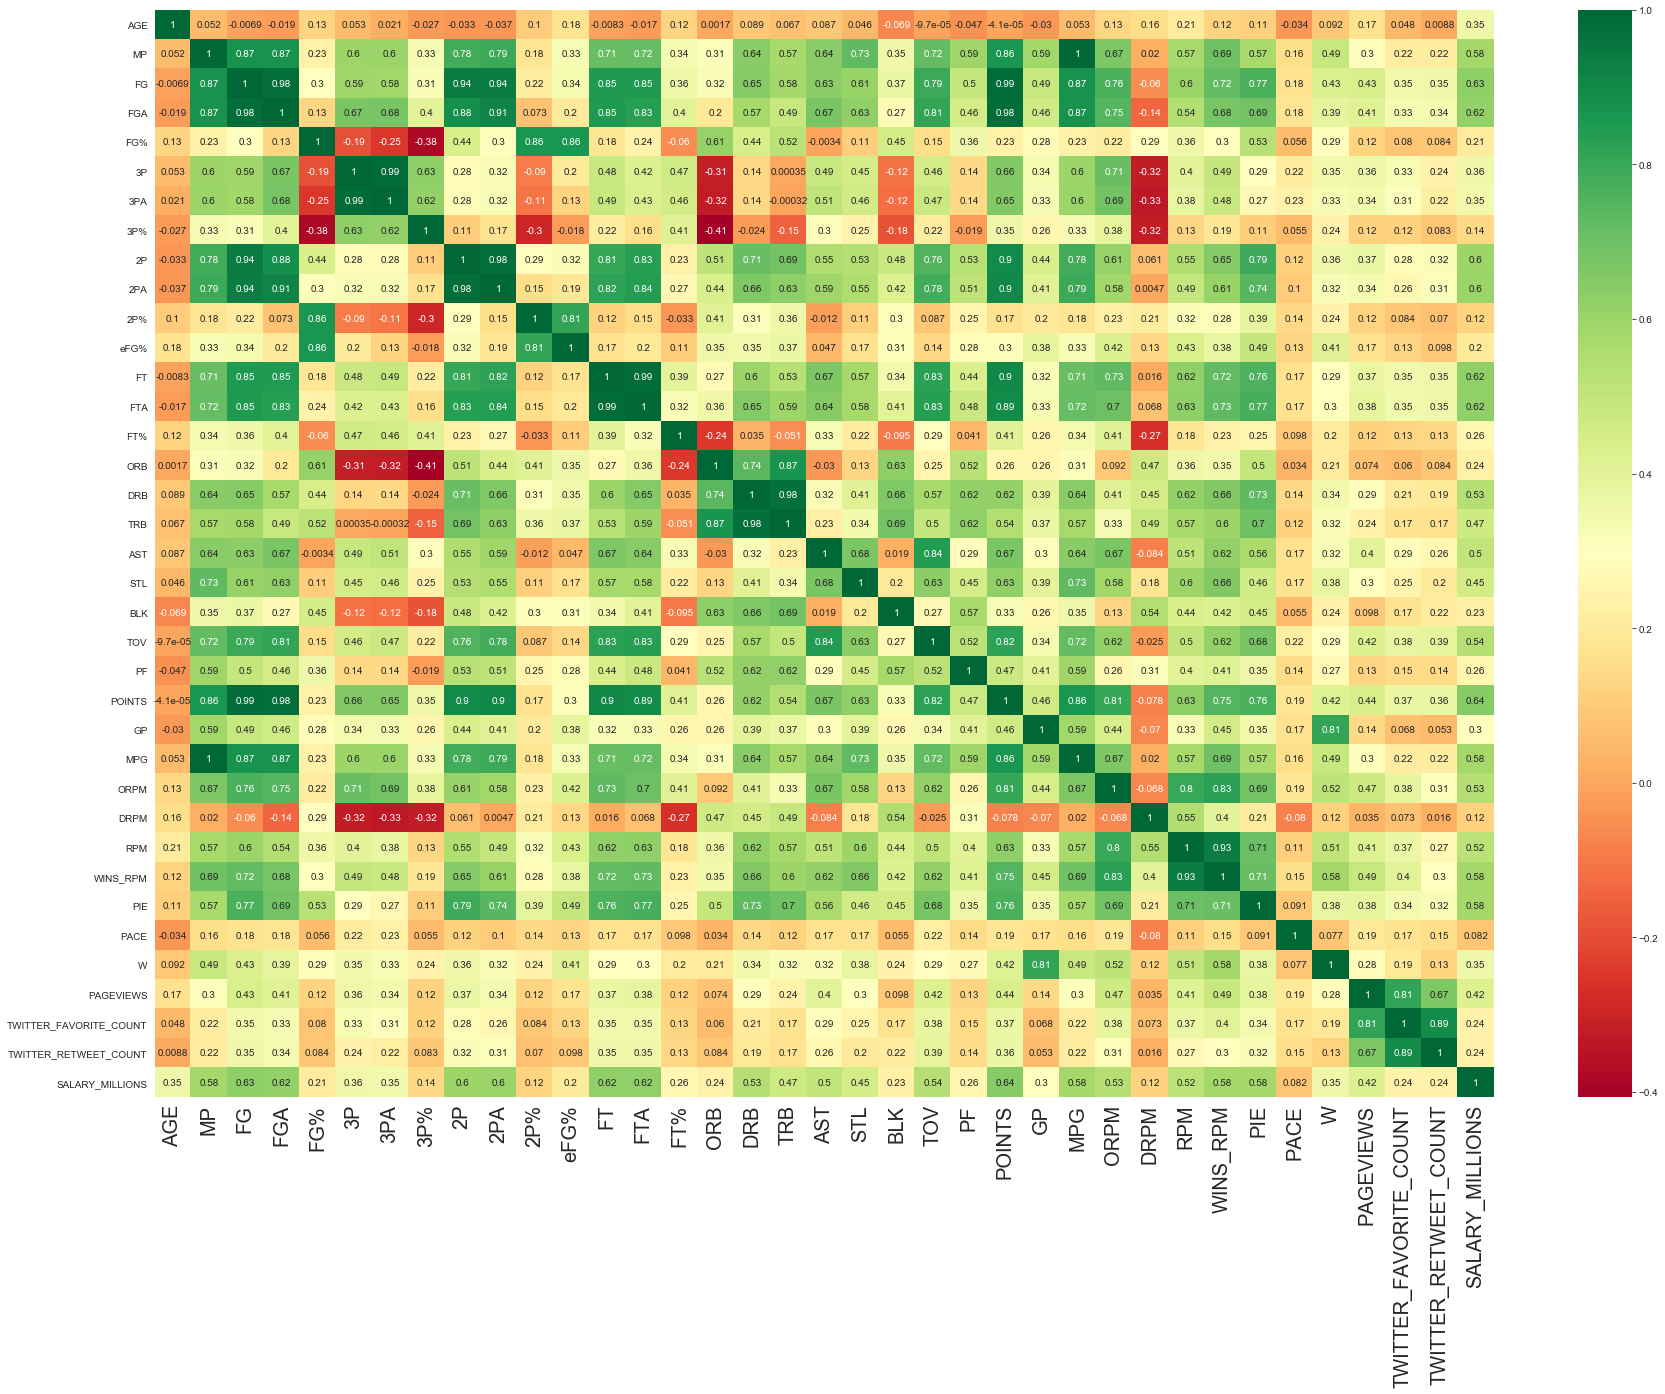

In [38]:
correlationPlot(salaries)

In [39]:
salaries_Temp = salaries.copy()
salaries_Temp = salaries_Temp.rename(columns={"FG%":"FGPerc","3P":"threePts","2P":"twoPts","3PA":"threePtsAtt",
                                              "2PA":"twoPtsAtt",
                                              "3P%":"threePPerc","2P%":"twoPPerc","eFG%":"eFGPerc","FT%":"FTPerc"})
salaries_Temp.columns.tolist()

['PLAYER',
 'AGE',
 'MP',
 'FG',
 'FGA',
 'FGPerc',
 'threePts',
 'threePtsAtt',
 'threePPerc',
 'twoPts',
 'twoPtsAtt',
 'twoPPerc',
 'eFGPerc',
 'FT',
 'FTA',
 'FTPerc',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'POINTS',
 'GP',
 'MPG',
 'ORPM',
 'DRPM',
 'RPM',
 'WINS_RPM',
 'PIE',
 'PACE',
 'W',
 'PAGEVIEWS',
 'TWITTER_FAVORITE_COUNT',
 'TWITTER_RETWEET_COUNT',
 'SALARY_MILLIONS']

In [40]:
mCols = salaries_Temp.columns.tolist()
mCols.remove("PLAYER")
mCols.remove("SALARY_MILLIONS")
y, X = dmatrices('SALARY_MILLIONS ~'+ "+".join(mCols), data=salaries_Temp, return_type='dataframe')

vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [round(variance_inflation_factor(X.values, i),0) for i in range(X.shape[1])]
vif[vif['VIF']>10]

/Users/lawrence/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variable        VIF
0                Intercept     2029.0
2                       MP  2124025.0
3                       FG     5887.0
4                      FGA    14071.0
5                   FGPerc       56.0
6                 threePts      524.0
7              threePtsAtt     2621.0
9                   twoPts     1928.0
10               twoPtsAtt     8347.0
12                 eFGPerc       33.0
13                      FT      691.0
14                     FTA      120.0
16                     ORB      328.0
17                     DRB     1769.0
18                     TRB     3182.0
19                     AST       17.0
22                     TOV       16.0
24                  POINTS     8805.0
26                     MPG  2123019.0
27                    ORPM        inf
28                    DRPM        inf
29                     RPM        inf
30                WINS_RPM       27.0
31                     PIE       20.0
35  TWITTER_FAVORITE_COUNT       12.0

In [41]:
from sklearn.linear_model import Ridge, RidgeCV
x = salaries.iloc[:,1:-1]
y = salaries.iloc[:,-1]
sc = StandardScaler()
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regr_cv=RidgeCV(alphas=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20])
model_cv=regr_cv.fit(X_train,y_train)

print(model_cv.alpha_)

20.0


In [42]:
rr = Ridge(alpha=1)
rr.fit(X_train,y_train)
pred = rr.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

print("RMSE : ",test_set_rmse)
print("R2 Score : ",round(test_set_r2,2))

RMSE :  4.098255575362749
R2 Score :  0.65


In [53]:
seasons_Stats_1718 = pd.read_csv("Data/Seasons_Data.csv")
nba_Salary_1718 = pd.read_csv("Data/datasets_17435_36417_NBA_season1718_salary.csv")

In [54]:
seasons_Stats_1718.shape

(2529, 49)

In [55]:
seasons_Stats_1718.isna().sum()

Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%        15
3PAr       15
FTr        15
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%       15
USG%        0
OWS         0
DWS         0
WS          0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%        15
3P          0
3PA         0
3P%       207
2P          0
2PA         0
2P%        46
eFG%       15
FT          0
FTA         0
FT%       149
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [46]:
nba_Salary_1718.isna().sum()

Unnamed: 0     0
Player         0
Tm             0
season17_18    0
dtype: int64

In [56]:
seasons_Stats_1718 = seasons_Stats_1718.fillna(seasons_Stats_1718.median())
seasons_Stats_1718.isna().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [57]:
seasons_Stats_1718.shape

(2529, 49)

In [58]:
nba_Salary_1718 = nba_Salary_1718.drop(['Unnamed: 0'],axis=1)

In [50]:
#Selecting season data with unique player data
seasons_Stats_1718 = seasons_Stats_1718.drop_duplicates(subset = ["Player"])

In [59]:
seasons_Stats_1718.shape

(2529, 49)

In [60]:
seasons_Stats_1718[['Player']] = seasons_Stats_1718.Player.str.split("\\").str[0]
seasons_Stats_1718[['Pos']] = seasons_Stats_1718.Pos.str.split("-").str[0]

In [61]:
seasons_Stats_1718.head()

Player Pos  Age   Tm   G  GS    MP   PER    TS%   3PAr  ...    FT%  \
0  Alex Abrines  SG   25  OKC  31   2   588   6.3  0.507  0.809  ...  0.923   
1    Quincy Acy  PF   28  PHO  10   0   123   2.9  0.379  0.833  ...  0.700   
2  Jaylen Adams  PG   22  ATL  34   1   428   7.6  0.474  0.673  ...  0.778   
3  Steven Adams   C   25  OKC  80  80  2669  18.5  0.591  0.002  ...  0.500   
4   Bam Adebayo   C   21  MIA  82  28  1913  17.9  0.623  0.031  ...  0.735   

   ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0    5   43   48   20   17    6   14   53   165  
1    3   22   25    8    1    4    4   24    17  
2   11   49   60   65   14    5   28   45   108  
3  391  369  760  124  117   76  135  204  1108  
4  165  432  597  184   71   65  121  203   729  

[5 rows x 49 columns]

In [ ]:
nba_Salary_1718.head()

In [ ]:
seasons_Stats_1718.columns

In [ ]:
seasons_Stats_1718.head()

In [ ]:
ml_Model_3_Data = pd.merge(seasons_Stats_1718,nba_Salary_1718,on='Player')

In [ ]:
ml_Model_3_Data.shape

In [ ]:
ml_Model_3_Data.columns

In [ ]:
ml_Model_3_Data = ml_Model_3_Data.drop("Tm_y",axis=1)
ml_Model_3_Data.rename(columns={"Tm_x":"Tm","season17_18":"Salary"},inplace=True)
ml_Model_3_Data_All_Features = ml_Model_3_Data.copy()
ml_Model_3_Data_All_Features.rename(columns={"WS/48":"WS48","TS%":"TSPerc","ORB%":"ORBPerc",
"DRB%":"DRBPerc","TRB%":"TRBPerc","AST%":"ASTPerc","STL%":"STLPerc","BLK%":"BLKPerc",
"TOV%":"TOVPerc","USG%":"USGPerc","FG%":"FGPerc","3P%":"threePtPerc","2P%":"twoPtPPerc",
"eFG%":"eFGPerc","FT%":"FTPerc","3PAr":"threePAr","3P":"threePts","3PA":"threePtAttempts",
"2P":"twoPts","2PA":"twoPtAttempts"},inplace=True)
"""
"WS/48":"WS48","TS%":"TSPerc","ORB%":"ORBPerc",
"DRB%":"DRBPerc","TRB%":"TRBPerc","AST%":"ASTPerc","STL%":"STLPerc","BLK%":"BLKPerc",
"TOV%":"TOVPerc","USG%":"USGPerc","FG%":"FGPerc","3P%":"threePtPerc","2P%":"twoPtPPerc",
"eFG%":"eFGPerc","FT%":"FTPerc","3PAr":"threePAr","3P":"threePts","3PA":"threePtAttempts",
"2P":"twoPts","2PA":"twoPtAttempts"
"""

In [ ]:
ml_Model_3_Data.columns

In [ ]:
ml_Model_3_Data.head()

In [ ]:
ml_Model_3_Data['Pos'].value_counts()

In [ ]:
def vif_Calculate(dataset):
    mCols = dataset.columns.tolist()
    mCols.remove("Player")
    mCols.remove("Salary")
    y, X = dmatrices('Salary ~'+ "+".join(mCols), data=dataset, return_type='dataframe')

    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [round(variance_inflation_factor(X.values, i),0) for i in range(X.shape[1])]

    #view VIF for each explanatory variable 
    return vif

In [37]:
#Feature selection
def correlationPlot(dataSet):
    correlation_Matrix_3 = dataSet.corr()
    features_3 = correlation_Matrix_3.index
    plt.figure(figsize=(30,20))
    ml_3_data_heatMap = sns.heatmap(dataSet[features_3].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# As per two research papers, the following are the determinants which can be used to predict salary of a NBA Player
determinants_and_target = ['Player','MP','PER','3P','2P','FT','ORB','DRB','AST','STL','BLK','TOV','PF',"Pos","Salary"]
ml_Model_3_Data_With_Selected_Features = ml_Model_3_Data.loc[:,determinants_and_target]
ml_Model_3_Data_With_Selected_Features.head()

In [ ]:
#Data distribution
def pairPlot(dataSet):
    sns.set(font_scale=1.5)
    sns.pairplot(dataSet)

In [ ]:
pairPlot(ml_Model_3_Data_With_Selected_Features)

From the above pairpolot, the independent variables are positively skewed and it is not normally distributed which can be observed along the diagonal

In [ ]:
correlationPlot(ml_Model_3_Data_With_Selected_Features)

In [ ]:
multicollinearity_Check_Data = ml_Model_3_Data_With_Selected_Features.copy()
multicollinearity_Check_Data.rename(columns={"3P":"threePts","2P":"twoPts"},inplace=True)
#multicollinearity_Check_Data = pd.get_dummies(multicollinearity_Check_Data,columns=['Pos'])

In [ ]:
vif_Calculate(multicollinearity_Check_Data)

In [ ]:
multicollinearity_Check_Data = multicollinearity_Check_Data.drop("TOV",axis = 1)
multicollinearity_Check_Data.columns
vif_Calculate(multicollinearity_Check_Data)
# Removed variables = MP and TOV which is having VIF value > 10

In [ ]:
multicollinearity_Check_Data.head()

In [ ]:
pairPlot(multicollinearity_Check_Data)

From the above pairpolot, the independent variables are positively skewed and it is not normally distributed which can be observed along the diagonal. From the scatter plot, we can observe that variance is expanded towards right.

There will be three multiple linear regression models and they are;
* <b>Model 1</b> with all features.
* <b>Model 2</b> with selected features.
* <b>Model 3</b> with features which don't have multicollinearity.

In [ ]:
#All features
x_all = ml_Model_3_Data.iloc[:,1:-1]
y_all = ml_Model_3_Data.iloc[:,-1]
x_all = pd.get_dummies(x_all,columns=['Pos'])
x_all = x_all.drop("Tm",axis=1)

X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(x_all, y_all, test_size=0.2, random_state=0)

sc_X_all = StandardScaler()
X_train_all = sc_X_all.fit_transform(X_train_all)
X_test_all = sc_X_all.transform(X_test_all)

#Selected data
x_selected = ml_Model_3_Data_With_Selected_Features.iloc[:,1:-1]
x_selected = pd.get_dummies(x_selected,columns=['Pos'])
y_selected = ml_Model_3_Data_With_Selected_Features.iloc[:,-1]

X_train_selected, X_test_selected, Y_train_selected, Y_test_selected = train_test_split(x_selected, y_selected, 
                                                                                        test_size=0.2, random_state=0)

sc_X_selected = StandardScaler()
X_train_selected = sc_X_selected.fit_transform(X_train_selected)
X_test_selected = sc_X_selected.transform(X_test_selected)

#No multicollinearity data
x_m_selected = multicollinearity_Check_Data.iloc[:,1:-1]
x_m_selected = pd.get_dummies(x_m_selected,columns=['Pos'])
y_m_selected = multicollinearity_Check_Data.iloc[:,-1]

X_train_m_selected, X_test_m_selected, Y_train_m_selected, Y_test_m_selected = train_test_split(x_m_selected, y_m_selected, 
                                                                                        test_size=0.2, random_state=0)

sc_X_m_selected = StandardScaler()
X_train_m_selected = sc_X_m_selected.fit_transform(X_train_m_selected)
X_test_m_selected = sc_X_m_selected.transform(X_test_m_selected)

#### Multiple linear regression

In [ ]:
def do_LinearRegression(x_train,y_train,x_test,y_test):
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    print('Intercept:', regr.intercept_)
    print('Coefficients: \n', regr.coef_)
    pred = regr.predict(x_test)
    
    test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    test_set_r2 = r2_score(y_test, pred)

    print("RMSE : ",test_set_rmse)
    print("R2 Score : ",test_set_r2)
    
#     X = sm.add_constant(x_train) # adding a constant
 
#     model = sm.OLS(y_train, X).fit()
#     predictions = model.predict(X) 

#     print_model = model.summary()
#     print("\n",print_model)

#### Model 1

In [ ]:
do_LinearRegression(X_train_all,Y_train_all,X_test_all,Y_test_all)

#### Model 2

In [ ]:
do_LinearRegression(X_train_selected,Y_train_selected,X_test_selected,Y_test_selected)

#### Model 3

In [ ]:
do_LinearRegression(X_train_m_selected, Y_train_m_selected, X_test_m_selected, Y_test_m_selected)